<a href="https://colab.research.google.com/github/furkanonat/DS-Unit-1-Build-Storytelling-Project/blob/master/Furkan_Onat_BuildWeek1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toy Products in Amazon UK Dataset

So now let's assume that I am an entrepreneur who is enthusiastic about toys. I find a dataset on Kaggle for toy products offered and sold on Amazon UK. Even though the dataset has no sales figures (items sold, revenue), I will try to find some insights to build my own strategy for product choice and pricing.

# Import Data

In [0]:
import numpy as np
import pandas as pd

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fonat10","key":"392f4809ca6e588cb605b2c0e4fe3aa2"}'}

In [0]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets download -d PromptCloudHQ/toy-products-on-amazon

 61% 5.00M/8.18M [00:00<00:00, 50.2MB/s]
100% 8.18M/8.18M [00:00<00:00, 52.4MB/s]


In [0]:
! unzip /content/toy-products-on-amazon.zip

Archive:  /content/toy-products-on-amazon.zip
  inflating: amazon_co-ecommerce_sample.csv  


In [0]:
toys= pd.read_csv('/content/amazon_co-ecommerce_sample.csv')

print(toys.shape)
toys.head()

(10000, 17)


,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


# Cleaning Data

There are 17 columns in the dataset. Some of the columns are full of Nan values which I will eliminate.  I wıll also drop unnecessary.

In [0]:
toys.isnull().sum().sort_values()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
number_of_reviews                                18
average_review_rating                            18
customer_reviews                                 21
product_information                              58
product_description                             651
description                                     651
amazon_category_and_sub_category                690
number_of_answered_questions                    765
customers_who_bought_this_item_also_bought     1062
price                                          1435
number_available_in_stock                      2500
items_customers_buy_after_viewing_this_item    3065
sellers                                        3082
customer_questions_and_answers                 9086
dtype: int64

In [0]:
toys['price'].value_counts(ascending=False, dropna=False)

NaN        1435
£9.99       189
£4.99       140
£14.99      132
£6.99       126
           ... 
£255.25       1
£22.20        1
£198.00       1
£62.00        1
£18.71        1
Name: price, Length: 2626, dtype: int64

In [0]:
toys['number_of_answered_questions'].value_counts(dropna=False).head(10)

1.0     6435
2.0     1469
NaN      765
3.0      566
4.0      235
5.0      161
6.0       82
11.0      79
9.0       54
7.0       46
Name: number_of_answered_questions, dtype: int64

I delete the pound symbol from the price to convert it to float from string.

In [0]:
# new data frame with split value columns 
new = toys["price"].str.split('£', n = 1, expand = True) 
  
new.head()


,0,1
0,,3.42
1,,16.99
2,,9.99
3,,39.99
4,,32.19


In [0]:
# Dropping old Price column
toys.drop(columns =["price"], inplace = True) 

In [0]:
# making separate column from new data frame 
toys["price"]= new[1] 
  




I also leave the rating column only with its numeric value. 




In [0]:
# new data frame with split value columns 
new_rating = toys["average_review_rating"].str.split(' ', n = 1, expand = True) 
new_rating.head()

,0,1
0,4.9,out of 5 stars
1,4.5,out of 5 stars
2,3.9,out of 5 stars
3,5.0,out of 5 stars
4,4.7,out of 5 stars


In [0]:
# Dropping old rating column
toys.drop(columns =["average_review_rating"], inplace = True) 

# Adding new rating column
toys['average_review_rating']= new_rating[0]

toys.head()

,uniq_id,product_name,manufacturer,number_available_in_stock,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,price,average_review_rating
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,5 new,15,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",3.42,4.9
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,NaN,2,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",16.99,4.5
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,2 new,17,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",9.99,3.9
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,NaN,1,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,39.99,5.0
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,NaN,3,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,32.19,4.7


In [0]:
toys.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
number_available_in_stock                       object
number_of_reviews                               object
number_of_answered_questions                   float64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
sellers                                         object
price                                           object
average_review_rating                           object
dtype: object

I will drop the columns I won't use and assign the new dataset to a new variable. Discarding them here will help me to reduce the number of rows that will be lost due to implementing dropna() function later.

In [0]:
toys_2 = toys.drop(['product_information','items_customers_buy_after_viewing_this_item','number_available_in_stock','amazon_category_and_sub_category','customers_who_bought_this_item_also_bought','description','product_description','customer_questions_and_answers', 'customer_reviews','sellers'], axis=1)
toys_2.tail()


,uniq_id,product_name,manufacturer,number_of_reviews,number_of_answered_questions,price,average_review_rating
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,3,3.0,22.95,5.0
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,1,3.0,39.99,4.0
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,1,3.0,43.99,5.0
9998,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,DC Comics,1,3.0,49.81,5.0
9999,94d18e86e504bee1e392df7e5738b18a,Star Wars 1/72 Y-Wing Starfighter,Bandai,11,3.0,21.20,4.5


In [0]:
print(toys_2.shape)
toys_2.isnull().sum()

(10000, 7)


uniq_id                            0
product_name                       0
manufacturer                       7
number_of_reviews                 18
number_of_answered_questions     765
price                           1435
average_review_rating             18
dtype: int64

I can drop the Nan values now, without reducing the observations in high numbers unnecessarily. Numbers of rows declined to 7,900 from 10,000.

In [0]:
toys_2.dropna(inplace=True)
print(toys_2.shape)

(7871, 7)


In [0]:
toys_2.isnull().sum()

uniq_id                         0
product_name                    0
manufacturer                    0
number_of_reviews               0
number_of_answered_questions    0
price                           0
average_review_rating           0
dtype: int64

In [0]:
toys_2.dtypes

uniq_id                          object
product_name                     object
manufacturer                     object
number_of_reviews                object
number_of_answered_questions    float64
price                            object
average_review_rating            object
dtype: object

I will convert some of the columns from string to float.  

In [0]:

toys_2.number_of_reviews=pd.to_numeric(toys_2['number_of_reviews'], errors='coerce')
toys_2.average_review_rating=pd.to_numeric(toys_2['average_review_rating'])
toys_2.price=pd.to_numeric(toys_2['price'], errors='coerce')

In [0]:
toys_2.dtypes

uniq_id                          object
product_name                     object
manufacturer                     object
number_of_reviews               float64
number_of_answered_questions    float64
price                           float64
average_review_rating           float64
dtype: object

In [0]:
toys_2.describe()

,number_of_reviews,number_of_answered_questions,price,average_review_rating
count,7869.000000,7871.000000,7853.000000,7871.000000
mean,9.402338,1.849574,20.566291,4.708538
std,30.672156,2.551575,39.222383,0.370080
min,1.000000,1.000000,0.010000,2.300000
25%,1.000000,1.000000,4.990000,4.500000
50%,2.000000,1.000000,10.990000,5.000000
75%,6.000000,2.000000,20.490000,5.000000
max,802.000000,39.000000,995.110000,5.000000


In [0]:
toys_2.nunique()

uniq_id                         7871
product_name                    7843
manufacturer                    2253
number_of_reviews                182
number_of_answered_questions      19
price                           2516
average_review_rating             18
dtype: int64

# Exploration And Analysis

I want to see the manufacturers with the highest number of the offerings. Brand names such as Lego, Disney,Mattel, Hasbro dominate the traditional retail channel also. Their shares over the total number of listings are low.  

In [0]:
toys['manufacturer'].value_counts()[:20]

LEGO                             171
Disney                           167
Oxford Diecast                   156
Playmobil                        147
Star Wars                        120
Mattel                           114
Hasbro                           110
The Puppet Company               109
MyTinyWorld                       93
Corgi                             90
Hornby                            87
Scalextric                        76
Pokémon                           69
Schleich                          68
Amscan                            65
Every-occasion-party-supplies     62
FunKo                             59
Melissa & Doug                    59
Papo                              58
Tamiya                            57
Name: manufacturer, dtype: int64

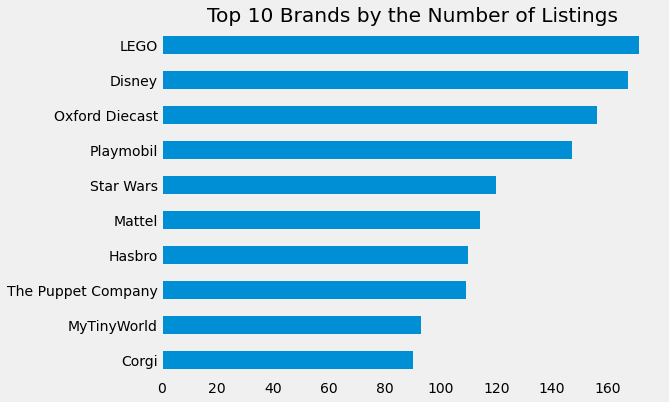

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Stylesheet to start from
plt.style.use('fivethirtyeight')

toys['manufacturer'].value_counts()[:10].sort_values().plot(kind='barh', figsize=(8,6), title = 'Top 10 Brands by the Number of Listings', grid=False);

I want to learn more about the selling price levels of toys offered. This can give me some insight for my choice of product and pricing strategy. Most of the toy prices are below 50 British pounds.

In [0]:
toys['price'].value_counts(dropna=False)[:50]

NaN      1435
9.99      189
4.99      140
14.99     132
5.99      126
6.99      126
7.99      125
12.99     124
2.99      118
3.99      114
19.99     112
11.99      89
8.99       82
1.99       78
10.99      77
24.99      69
13.99      62
29.99      61
16.99      52
17.99      42
15.99      41
7.95       41
0.99       39
39.99      39
9.95       39
15.00      37
3.95       36
1.50       32
0.90       32
4.49       32
2.49       32
34.99      30
18.99      28
10.00      28
3.49       28
1.29       27
6.00       27
2.50       25
19.95      24
12.95      24
10.95      24
5.00       24
1.49       23
5.95       23
11.95      23
21.99      23
4.95       23
6.95       23
3.50       23
4.50       22
Name: price, dtype: int64

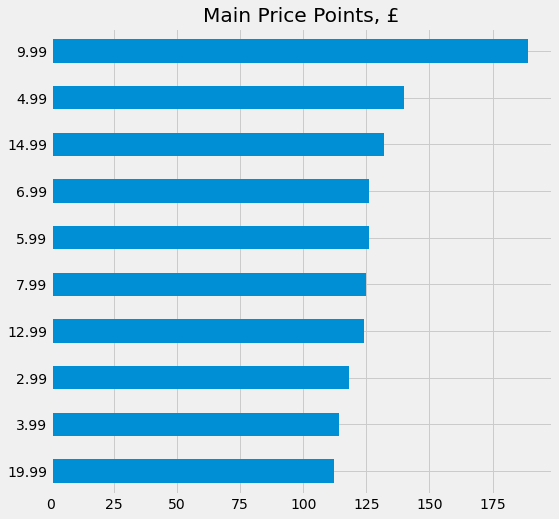

In [0]:
toys['price'].value_counts()[:10].sort_values().plot(kind='barh', figsize=(8,8), title = 'Main Price Points, £', grid=True);

I want to inspect the features of large brands individually. So I will create seperate datasets for each brand.

In [0]:
lego_df = toys_2[(toys_2['manufacturer'] == 'LEGO')]
print(lego_df.shape)
lego_df.head()

(126, 7)


,uniq_id,product_name,manufacturer,number_of_reviews,number_of_answered_questions,price,average_review_rating
614,1cde07d3e45fdfb1b1966368d3b7a522,Lego City 2824: Advent Calendar 2010,LEGO,40.0,6.0,43.87,4.7
626,900e782753c3cc6a6396da3315add573,LEGO Friends 41016: Advent Calendar,LEGO,87.0,1.0,24.95,4.5
627,15e03b806b3d90bced2186049c4f3613,LEGO Star Wars 75018: Jek-14's Stealth Starfig...,LEGO,30.0,1.0,68.87,4.8
634,e87cd0e23c41ae769787c4eeb4b7724c,LEGO City 7687 Advent Calendar 2009,LEGO,45.0,4.0,24.99,4.8
651,ec2b46b7363449a91b66a0e721ae4b9a,LEGO Star Wars 75015: Corporate Alliance Tank ...,LEGO,34.0,2.0,39.99,4.8


In [0]:
print(lego_df['price'].mean())
print(lego_df['price'].median())

33.30158730158726
18.82


Calculating the average and median prices of Disney Toys

In [0]:
disney_df = toys_2[(toys_2['manufacturer'] == 'Disney')]
print(disney_df.shape)
disney_df.head()

(128, 7)


,uniq_id,product_name,manufacturer,number_of_reviews,number_of_answered_questions,price,average_review_rating
309,c375310e315e2763112e32d6b4a6f244,DESPICABLE ME 2 - Minion cuddly Soft Toy - Plu...,Disney,1.0,1.0,19.99,5.0
393,bbcca2bfe3b2eee013552a4b9ae33e10,Disney Mickey 2-in-1 Cushion Plush,Disney,8.0,1.0,8.05,4.1
639,67b207003af3513504c32927353199f1,Lanyard With Dopey Head Dangle - Snow White an...,Disney,5.0,4.0,9.71,5.0
858,94edb0011dae6eb9a378bc28af92448b,Disney Cars 2 Die Cast 1:55 Scale Mel Dorado #27,Disney,11.0,1.0,9.69,4.8
950,d14c9cf731e72d8494e76cea807a7d01,Disney Pixar Cars Diecast Boost With Flames,Disney,6.0,1.0,14.99,5.0


In [0]:
print(disney_df['price'].mean())
print(disney_df['price'].median())

15.815000000000008
10.99


Calculating the average and median prices of Oxford Diecast toys

In [0]:
oxford_df = toys_2[(toys_2['manufacturer'] == 'Oxford Diecast')]
print(oxford_df.shape)
oxford_df.head()

(145, 7)


,uniq_id,product_name,manufacturer,number_of_reviews,number_of_answered_questions,price,average_review_rating
804,d994e8cb4d0b15683da91652901d9895,Oxford Diecast Anglia Police Panda 76105003,Oxford Diecast,4.0,11.0,4.75,4.8
830,8f4a9ace7bb4ae6e6d8dda96d94bd332,Oxford Diecast Evening News Metal Model,Oxford Diecast,1.0,1.0,10.95,5.0
835,af9511db607fe37119d4487c12f4d91d,Jaguar SS 2.5 Saloon - Cream,Oxford Diecast,1.0,1.0,24.99,5.0
838,168f748bc19af21dfabafdefb65522a0,Oxford Diecast Bertram Mills David Brown Tract...,Oxford Diecast,1.0,1.0,7.21,5.0
839,231cc7273399cc91df8f5d452eea4283,Oxford Diecast Bronze Green 76LAN188003,Oxford Diecast,2.0,1.0,6.75,4.5


In [0]:
print(oxford_df['price'].mean())
print(oxford_df['price'].median())

10.830344827586218
7.89


 Calculating the average and median prices of Playmobil toys

In [0]:
playmobil_df = toys_2[(toys_2['manufacturer'] == 'Playmobil')]
print(playmobil_df.shape)
playmobil_df.head()

(111, 7)


,uniq_id,product_name,manufacturer,number_of_reviews,number_of_answered_questions,price,average_review_rating
604,a86f57bbf3abbddd964f1ca438a07c94,Playmobil 5494 Christmas Advent Calendar Santa...,Playmobil,199.0,6.0,15.39,4.6
607,e2a748b0444a17197507da171de29d62,Playmobil Advent Calendar Xmas,Playmobil,1.0,6.0,61.38,5.0
617,3dc26045ca282ada5bdd837c3f832dd7,Playmobil 5493 Christmas Advent Calendar Drago...,Playmobil,129.0,1.0,16.80,4.9
621,e637801d643980ef6ac33baaea71ec78,Playmobil 5496 Advent Calendar Christmas Room ...,Playmobil,56.0,1.0,17.99,4.8
637,04fd83ec261065f57ef966019881df19,PLAYMOBIL 5217 SINTERKLAAS ADVENT KALENDER CAL...,Playmobil,1.0,4.0,19.59,5.0


In [0]:
print(playmobil_df['price'].mean())
print(playmobil_df['price'].median())

29.87207207207204
17.99


 Calculating the average and median prices of Star Wars toys"

In [0]:
starwars_df = toys_2[(toys_2['manufacturer'] == 'Star Wars')]
print(starwars_df.shape)
starwars_df.head()

(87, 7)


,uniq_id,product_name,manufacturer,number_of_reviews,number_of_answered_questions,price,average_review_rating
236,5f2a2131a6ed73019ebe9a94fb98cacc,Star Wars 15 inch Talking Darth Vader Plush,Star Wars,3.0,1.0,22.99,5.0
652,aaa408672289b67260f0b3c146c5097a,LEGO Star Wars 75023: Advent Calendar 2013,Star Wars,142.0,2.0,42.51,4.6
754,1668098e56bc7b0b909607e5e3e89dc1,LEGO Star Wars 75056 LEGO Star Wars Advent Cal...,Star Wars,253.0,7.0,63.97,4.7
1036,9efc8b828bfdb53fd971bdedb4cf677f,Star Wars: The Vintage Collection - Battle Droid,Star Wars,4.0,1.0,11.03,4.5
1051,e27875a83a604aa18807e7babea160bd,Star Wars Saga 2008 30Th Anniversary Wave 1 Ac...,Star Wars,2.0,1.0,10.47,5.0


In [0]:
print(starwars_df['price'].mean())
print(starwars_df['price'].median())

24.272298850574717
14.99


 Calculating the average and median prices of all toys

In [0]:
print(toys_2['price'].mean())
print(toys_2['price'].median())

20.566290589583748
10.99


In [0]:
data = {'Brand':['Lego', 'Disney', 'Oxford Diecast', 'Playmobil', 'Star Wars', 'All Toys'], 'Average':[33.30, 15.82, 10.83, 29.87, 24.27, 20.57], 'Median':[18.82, 10.99, 7.89, 17.99, 14.99, 10.99]}
print(data)

{'Brand': ['Lego', 'Disney', 'Oxford Diecast', 'Playmobil', 'Star Wars', 'All Toys'], 'Average': [33.3, 15.82, 10.83, 29.87, 24.27, 20.57], 'Median': [18.82, 10.99, 7.89, 17.99, 14.99, 10.99]}


In [0]:
ave_med = pd.DataFrame(data) 
print(ave_med)

            Brand  Average  Median
0            Lego    33.30   18.82
1          Disney    15.82   10.99
2  Oxford Diecast    10.83    7.89
3       Playmobil    29.87   17.99
4       Star Wars    24.27   14.99
5        All Toys    20.57   10.99


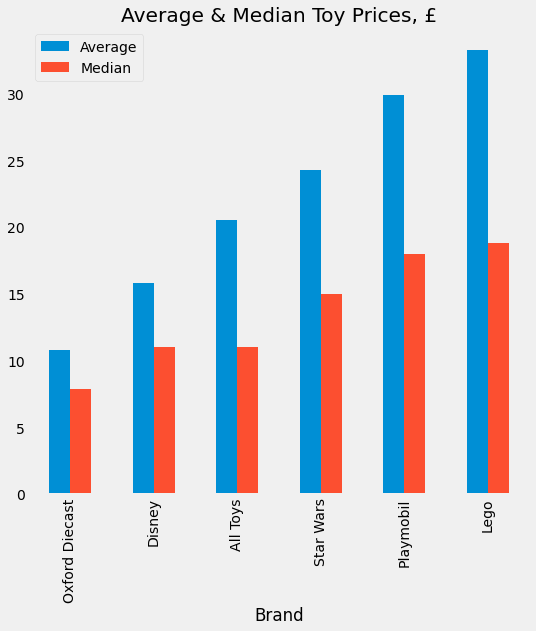

In [0]:
ave_med.sort_values(by='Average').plot.bar(x='Brand', figsize=(8,8), title='Average & Median Toy Prices, £', grid=False);

In [0]:
toys_2.rename(columns={'uniq_id':'product_id'}, inplace=True)

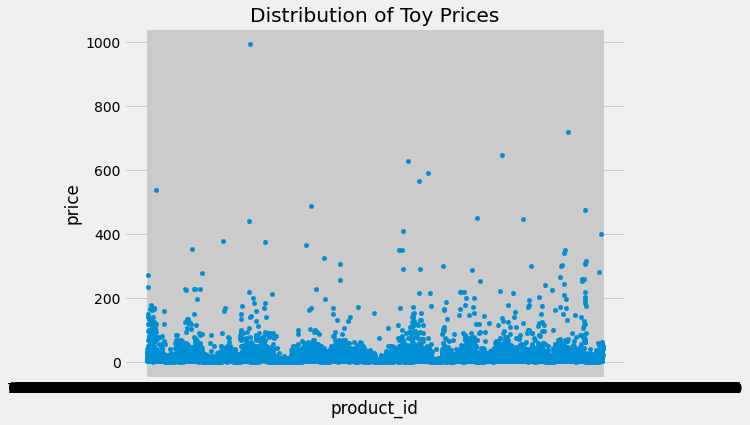

In [0]:
toys_2.plot.scatter('product_id', 'price', figsize=(8,6), title='Distribution of Toy Prices');

As this scatter chart shows, toy prices are mostly below 200 british pounds, and generally remain under 50 british pounds. By looking at this chart, I can say that there are not many listings over 100 british pounds so either there is an opportunity to sell high-priced toys or sets on Amazon or people buy high priced toys from other websites such as etsy or physical stores rather than Amazon.

I will look at the relationship between product ratings and reviews by creating a scatter plot. Listings with high ratings have more reviews. It may because products with high quality reach higher sales figures and higher sales volume brings higher number of reviews. Or it may because that people who had a bad experience with the product are not likely to write even negative reviews. 

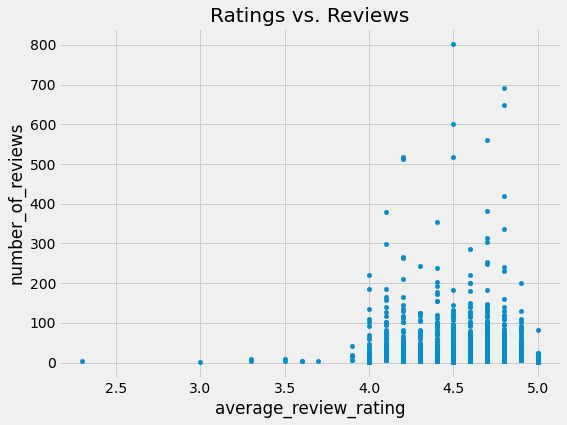

In [0]:
toys_2.plot.scatter('average_review_rating', 'number_of_reviews', title='Ratings vs. Reviews', figsize=(8,6));

Calculating the average rating of individual brands

In [0]:
print(lego_df['average_review_rating'].mean())
print(disney_df['average_review_rating'].mean())
print(oxford_df['average_review_rating'].mean())
print(playmobil_df['average_review_rating'].mean())
print(starwars_df['average_review_rating'].mean())
print(toys_2['average_review_rating'].mean())

4.727777777777776
4.682812499999999
4.785517241379309
4.719819819819822
4.737931034482759
4.708537669927581


In [0]:
data_2 = {'Brand':['Lego', 'Disney', 'Oxford Diecast', 'Playmobil', 'Star Wars', 'All Toys'], 'Average':[4.728, 4.683, 4.789, 4.72, 4.738, 4.709]}
print(data_2)

{'Brand': ['Lego', 'Disney', 'Oxford Diecast', 'Playmobil', 'Star Wars', 'All Toys'], 'Average': [4.728, 4.683, 4.789, 4.72, 4.738, 4.709]}


In [0]:
ave_rat = pd.DataFrame(data_2) 
print(ave_rat)

            Brand  Average
0            Lego    4.728
1          Disney    4.683
2  Oxford Diecast    4.789
3       Playmobil    4.720
4       Star Wars    4.738
5        All Toys    4.709


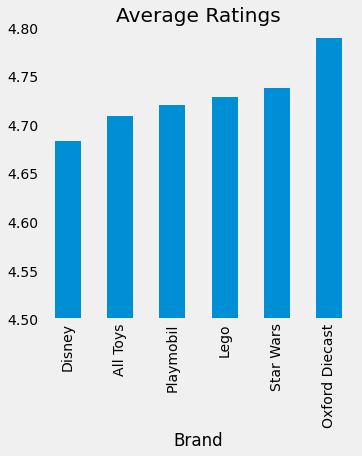

In [0]:
ave_rat.sort_values(by='Average').plot.bar(x='Brand', figsize=(5,5), title='Average Ratings', ylim=(4.5,4.8), legend=False, grid=False);

Average ratings of the listed toy products are high. There are not many products with ratings below 4 stars. The average rating of all toys listed is 4.71 while Oxford Diecast brand leads the group with 4.79 stars. Within the group, Disney brand is the only one with an average rating lower than overall toy ratings. It seems that customers are satisfied with quality of the current toy offerings.

# Conclusions

Even though the dataset lacked the sales figures, an important feature, it gave us some insights about toy brands, ratings and prices. This analysis may assist an entrepreneur to ask better questions for the product choice and pricing.# New Section